<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import re
def tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ^0-9]', '', str(text))
    return text.split()

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english', max_features = 5000)

dtm = tfidf.fit_transform(yelp['text'])

In [13]:
dtm.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
fake_review = """I tried out this new restaurant for dinner recently with a friend. It's very clean, spacious and contemporary on the inside. You can tell it's new. The staff was very nice, and they were helpful for understanding or recommending things on the menu. Pleasant people and Solid service. We loved the veggie samosas, especially with the channa chaat which came highly recommended. The garlic naan was good. I ordered a cheese Naan as well, but I think I preferred the garlic Naan which was thinner and a little crisper. We really enjoyed my Butter massala - chicken, and the sauce was great with our Naan...so creamy with flavor. My vegetarian friend ordered the Dal Makhani (I think that was the name) but it didn't go over too well and was our least favorite item. The team was very accommodating when she told them she didn't care for it. While we weren't feeling the taste, apparently it's popular among other guests. It's not the dahl that I'm used to but to each his own.

I look forward to returning to check out their lunch buffet. Try this place out for yourself! It's right off Matlock near Starbucks at the corner of that little strip where Loving Hut is."""

In [50]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 10, algorithm = 'ball_tree')

neighbors.fit(dtm.todense())


NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [51]:
new = tfidf.transform(tokenize(fake_review))

most_sim = neighbors.kneighbors(new.todense())

most_sim[1][0]

array([6204, 6311, 2471, 1105, 4530, 2534, 5464, 2153, 3685, 4355])

In [ ]:
for i in most_sim[1][0]:
    print(yelp['text'][i], '\n----------------------------------------------------------------------------------------------------\n\n')

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [54]:
features = yelp['text']
target = yelp['stars']

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(stop_words='english')

model = SGDClassifier()

pipe = Pipeline([('vectorizer', vectorizer), ('model', model)])

pipe.fit(features, target)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vectorizer__max_df': (0.5, 0.75, 1),
    'model__max_iter': (20, 10, 100)
}

grid_search = GridSearchCV(pipe, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(features, target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   52.1s finished
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__max_df': (0.5, 0.75, 1), 'model__max_iter': (20, 10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [60]:
accuracy_score(grid_search.predict(features), target)

0.89

In [62]:
grid_search.predict([fake_review])

array([4])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [82]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

def better_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ^0-9]', '', str(text))
    tokens = text.split()
    return [token for token in tokens if token not in STOPWORDS]


In [85]:
better_tokenize(fake_review)[:20]

['tried',
 'new',
 'restaurant',
 'dinner',
 'recently',
 'friend',
 'clean',
 'spacious',
 'contemporary',
 'inside',
 'tell',
 'new',
 'staff',
 'nice',
 'helpful',
 'understanding',
 'recommending',
 'things',
 'menu',
 'pleasant']

In [86]:
yelp['tokens'] = yelp['text'].apply(lambda x: better_tokenize(x))

In [87]:
id2word = corpora.Dictionary(yelp['tokens'])
id2word.filter_extremes(no_below=10, no_above=0.75)

In [88]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [130]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 7,
                   passes=10,
                   workers=2
                  )

In [131]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[2:5]) for t in words]

In [132]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [133]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Applications/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.099515  0.045815       1        1  24.052027
6      0.196044  0.096637       2        1  18.064602
4      0.101545 -0.026363       3        1  17.328127
1     -0.014604 -0.043727       4        1  15.283331
3     -0.168307 -0.109362       5        1   9.753935
2      0.140341 -0.084503       6        1   8.801935
5     -0.155505  0.121504       7        1   6.716053, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
137   Default  4741.000000        food  4741.000000  30.0000  30.0000
190   Default  4182.000000       great  4182.000000  29.0000  29.0000
353   Default   789.000000       pizza   789.000000  28.0000  28.0000
1053  Default  1347.000000     chicken  1347.000000  27.0000  27.0000
358   Default   788.000000       sauce   788.000000  26.0000  26.0000
43    Default  3500.000000     service  3500.000000  25.0000  25.0000
38    Default  4470.000000        good  4470.000000  24.0000  24.0000
123   Default  4672.000000       place  4672.000000  23.0000  23.0000
322   Default  1176.000000   delicious  1176.000000  22.0000  22.0000
468   Default  1002.000000        told  1002.000000  21.0000  21.0000
96    Default   934.000000        room   934.000000  20.0000  20.0000
130   Default   971.000000         bar   971.000000  19.0000  19.0000
1044  Default  1503.000000     ordered  1503.000000  18.0000  18.0000
313   Default   784.000000      cheese   784.000000  17.0000  17.0000
191   Default   388.000000        hair   388.000000  16.0000  16.0000
1693  Default   615.000000         car   615.000000  15.0000  15.0000
676   Default   532.000000       cream   532.000000  14.0000  14.0000
112   Default  1778.000000        best  1778.000000  13.0000  13.0000
1006  Default   600.000000      coffee   600.000000  12.0000  12.0000
28    Default  1240.000000        said  1240.000000  11.0000  11.0000
521   Default   486.000000         job   486.000000  10.0000  10.0000
333   Default   909.000000       fresh   909.000000   9.0000   9.0000
165   Default  1203.000000        menu  1203.000000   8.0000   8.0000
589   Default   701.000000      drinks   701.000000   7.0000   7.0000
177   Default  1323.000000     amazing  1323.000000   6.0000   6.0000
37    Default  1338.000000    friendly  1338.000000   5.0000   5.0000
680   Default   446.000000         ice   446.000000   4.0000   4.0000
168   Default  1155.000000   recommend  1155.000000   3.0000   3.0000
646   Default  1623.000000        love  1623.000000   2.0000   2.0000
577   Default  1322.000000  restaurant  1322.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1387   Topic7    71.827751         bun   108.404465   2.2891  -5.9930
833    Topic7   182.959763    sandwich   408.700745   1.8970  -5.0580
2820   Topic7    64.604218      onions    96.066986   2.3039  -6.0990
2078   Topic7   111.146873        thai   214.626495   2.0426  -5.5564
491    Topic7   108.150993       bacon   211.900055   2.0281  -5.5837
1762   Topic7   164.037903      burger   525.871643   1.5357  -5.1671
2623   Topic7    95.638168         bbq   219.465317   1.8700  -5.7067
313    Topic7   199.389542      cheese   784.411133   1.3310  -4.9720
1267   Topic7   165.584366       fries   578.504578   1.4497  -5.1578
112    Topic7   271.289856        best  1778.145264   0.8205  -4.6641
953    Topic7   179.385269    location   852.257568   1.1423  -5.0777
38     Topic7   397.912964        good  4470.379883   0.2817  -4.2810
347    Topic7   234.794373       order  1490.625488   0.8524  -4.8085
142    Topic7   143.936890         hot   571.157349   1.3224  -5.2979
1170   Topic7   126.862373   breakfast   458.891174   1.4150  -5.4241
16     Topic7   306.148651        like  3401.799805   0.2927  -4.5432
218    Topic7   128.464630        meat   

In [134]:
distro = [lda[d] for d in corpus]

In [137]:
def update(doc):
        d_dist = {k:0 for k in range(0,7)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [138]:
df = pd.DataFrame.from_records(new_distro)
df.columns = topics

df.head()

,place like ordered,great service good,service recommend hair,delicious coffee place,time great staff,good sauce like,service time didnt
0,0.000000,0.000000,0.000000,0.000000,0.107034,0.000000,0.875473
1,0.585306,0.010263,0.363425,0.010248,0.010271,0.010257,0.010228
2,0.000000,0.000000,0.000000,0.000000,0.872124,0.000000,0.118805
3,0.000000,0.457904,0.000000,0.000000,0.151345,0.000000,0.360590
4,0.977936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [119]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = yelp['tokens']
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [127]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        path = yelp['tokens'],
                                                        start=1, 
                                                        limit=10, 
                                                        step=1)

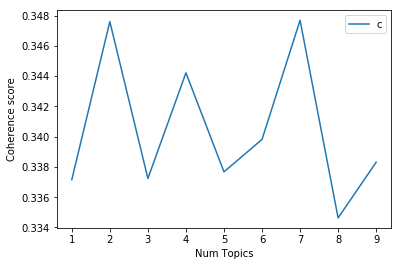

In [128]:
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show();

In [129]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3372
Num Topics = 2  has Coherence Value of 0.3476
Num Topics = 3  has Coherence Value of 0.3372
Num Topics = 4  has Coherence Value of 0.3442
Num Topics = 5  has Coherence Value of 0.3377
Num Topics = 6  has Coherence Value of 0.3398
Num Topics = 7  has Coherence Value of 0.3477
Num Topics = 8  has Coherence Value of 0.3346
Num Topics = 9  has Coherence Value of 0.3383


From my analysis it seems that many nagative leaning reviews contain information related to peoples time, while good reviews often contain information related to the actual food. Comments about service appear in both groups. This would seem to indicate that if a firm wished to improve upon its preformance it should focus on minimizing wasting customer time by retiring work processes that are percived by the customer as a waste of their time.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)